In [ ]:
!pip install yfinance --upgrade --no-cache-dir

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Dados = web.get_data_yahoo('BBSE3.SA', period='1y')
Dados.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [ ]:
Dados.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-07,23.290001,24.230000,23.200001,24.139999,22.422348,10674900
2022-02-08,24.200001,24.690001,23.920000,24.100000,22.385195,6656300
2022-02-09,24.100000,24.480000,24.049999,24.270000,22.543098,8916500
2022-02-10,24.370001,24.570000,23.990000,24.360001,22.626694,11822200
2022-02-11,23.000000,23.139999,22.469999,22.760000,21.979710,14612700


In [ ]:
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,37.779999,37.939999,36.549999,36.630001,36.630001,7670300
2023-02-02,36.549999,37.200001,36.189999,36.500000,36.500000,5810900
2023-02-03,36.619999,36.709999,36.049999,36.400002,36.400002,5689100
2023-02-06,36.400002,36.880001,36.090000,36.580002,36.580002,5085300
2023-02-07,0.000000,0.000000,0.000000,36.820000,36.820000,0


In [ ]:
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,27.920079,28.309087,27.616984,28.146349,27.669552,5.812522e+06
std,4.007362,4.067010,3.969945,3.653868,3.992020,2.613997e+06
min,0.000000,0.000000,0.000000,21.879999,21.129879,0.000000e+00
25%,25.322500,25.665000,25.020000,25.397500,24.526787,3.981450e+06
50%,27.915000,28.315001,27.495000,28.080001,27.536804,5.178300e+06
75%,30.230000,30.685000,29.902500,30.275001,30.082500,7.005800e+06
max,37.959999,38.270000,37.669998,37.900002,37.900002,1.639420e+07


In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-07 to 2023-02-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [ ]:
n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


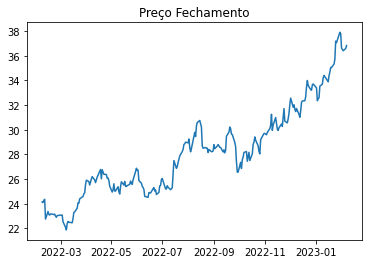

In [ ]:
plt.plot( Dados['Close'] )
plt.title('Preço Fechamento');

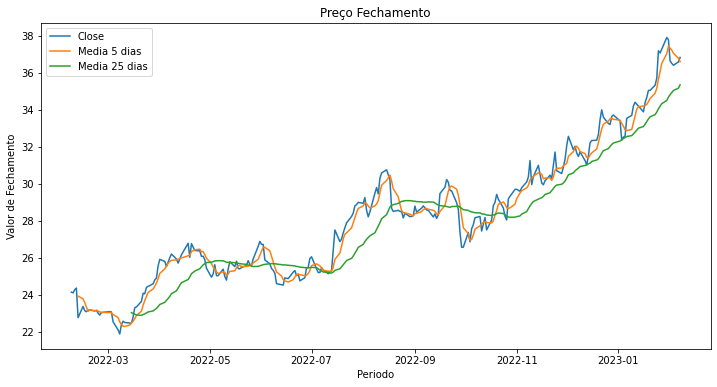

In [ ]:
from pandas.core import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados['Close'] )
plt.plot( Dados['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento')
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

In [ ]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

In [ ]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'
)

Figure.show()

In [ ]:
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

In [ ]:
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Banco do Brasil'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Diego Louven',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

In [ ]:
#!pip install -U kaleido

In [ ]:
Figura.write_image('Report_Fiananceiro.pdf')